In [11]:
import os
import sys
from sklearn.pipeline import Pipeline
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
rows = []

with open("Huzefa Data Set.csv", 'r') as inp:
    for line in inp:
        tok = line.strip().replace(")", '').replace("(",'').split(",")
        features = tok[-1].split("-")
        tok = tok[:-1] + features
        rows.append(tok)

data = pd.DataFrame(rows)
columns = ['form_id', 'views', 'submission'] + ["x_%d" % i for i in range(len(rows[0])-3)]
data.columns = columns

data = data.astype(float)
data['form_id'] = data['form_id'].astype(int)

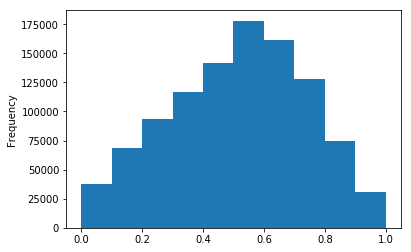

In [13]:
data['completion_rate'] = data['submission']/data['views']
data['completion_rate'].plot.hist()
plt.show()

In [14]:
data[["x_%d" % i for i in range(len(rows[0])-3)]].describe().loc[['mean','std','min','25%','50%','75%','max']].transpose()

,mean,std,min,25%,50%,75%,max
x_0,0.195451,0.396548,0.0,0.0,0.0,0.0,1.0
x_1,0.374912,0.933426,0.0,0.0,0.0,0.0,55.0
x_2,0.054973,0.440341,0.0,0.0,0.0,0.0,78.0
x_3,0.001025,0.033071,0.0,0.0,0.0,0.0,5.0
x_4,0.144949,0.480263,0.0,0.0,0.0,0.0,87.0
x_5,0.176905,0.947293,0.0,0.0,0.0,0.0,96.0
x_6,0.851395,1.883366,0.0,0.0,0.0,1.0,124.0
x_7,0.096056,0.310995,0.0,0.0,0.0,0.0,15.0
x_8,0.660574,1.240156,0.0,0.0,0.0,1.0,165.0
x_9,0.013566,0.133814,0.0,0.0,0.0,0.0,16.0


/home/dgxuser_layersvanguard/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


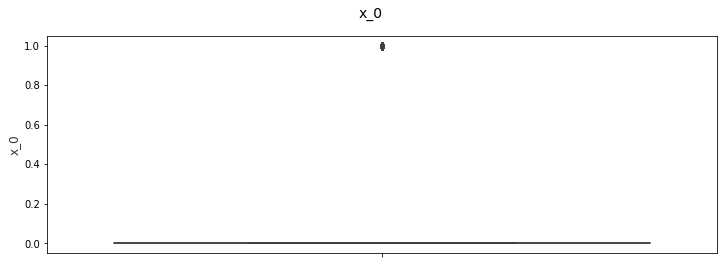

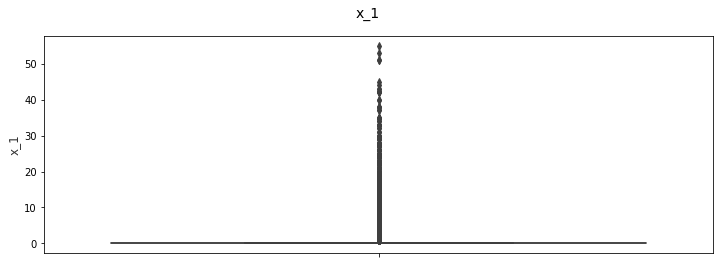

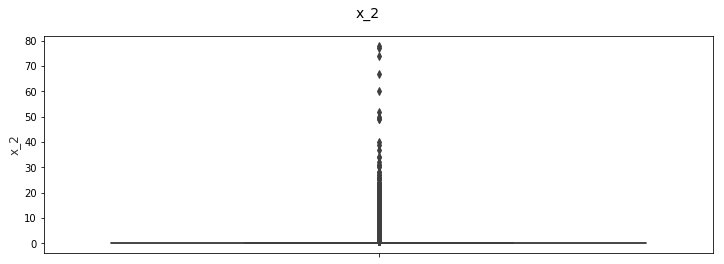

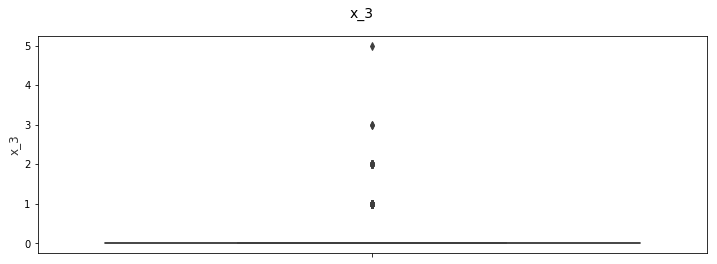

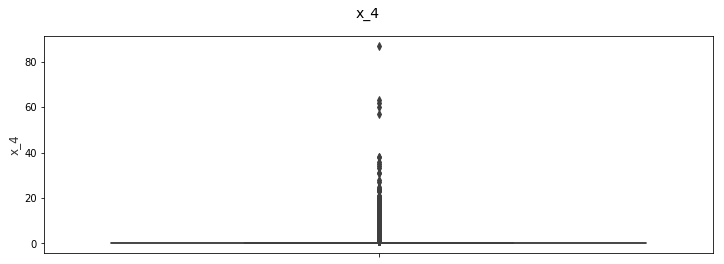

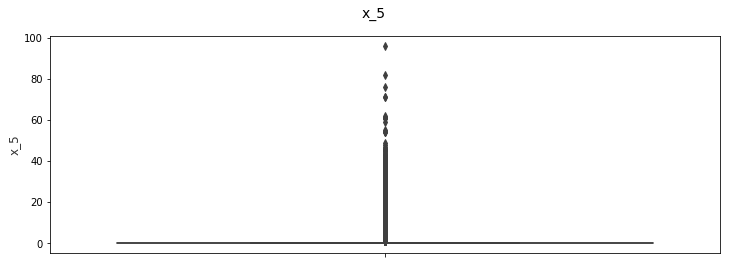

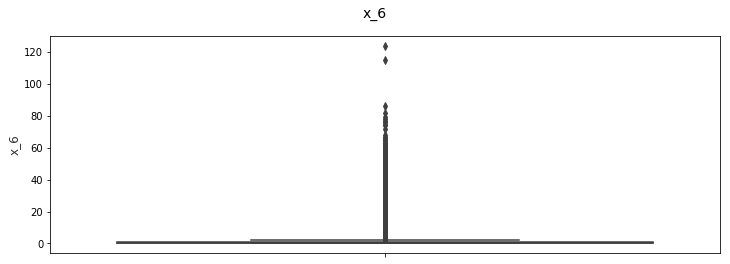

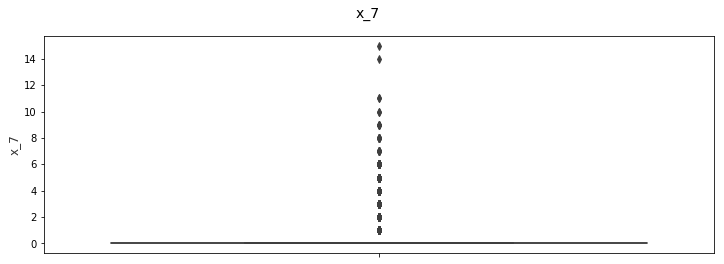

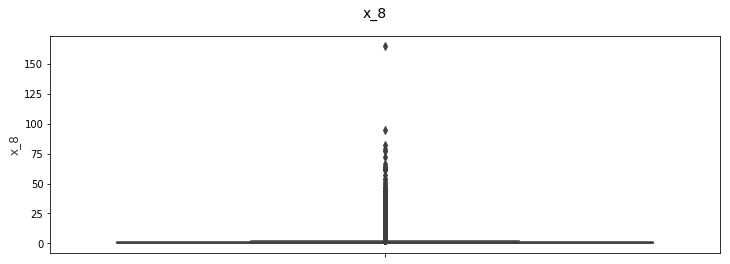

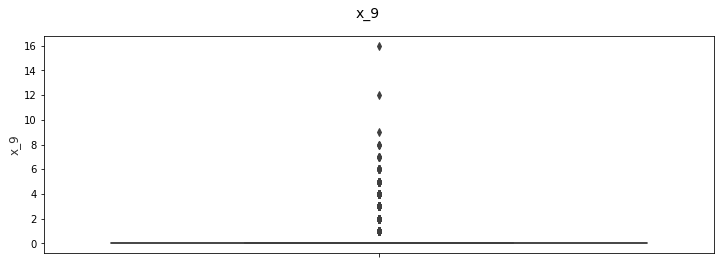

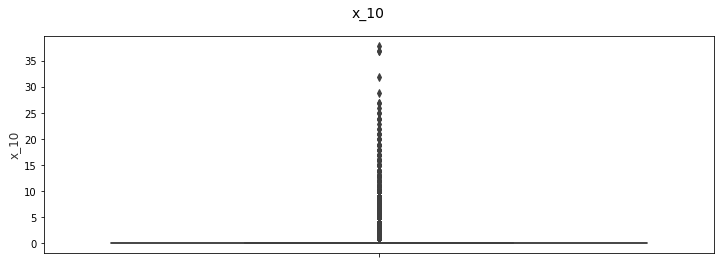

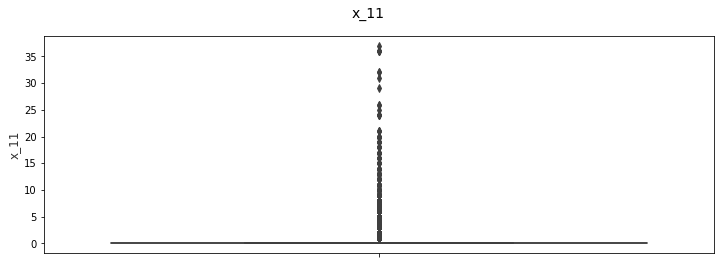

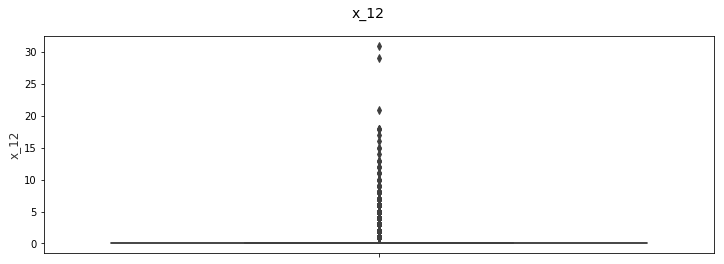

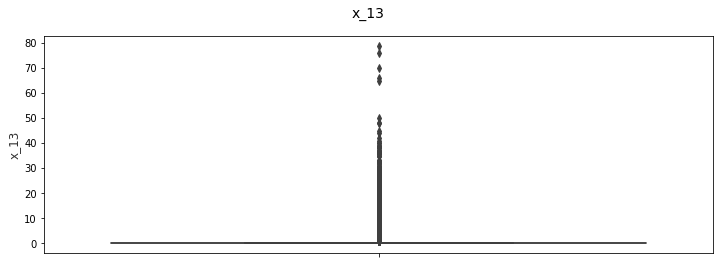

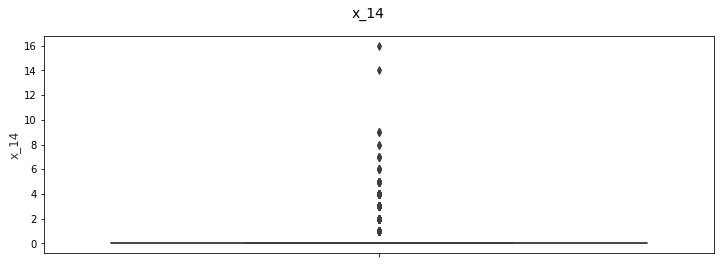

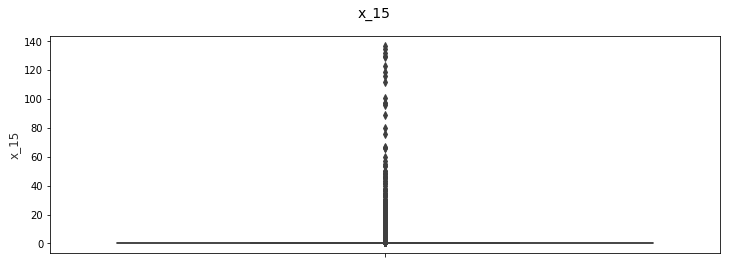

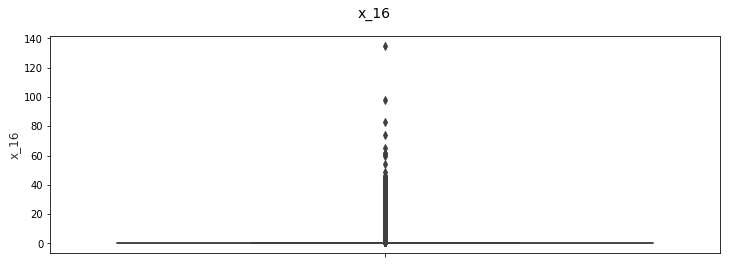

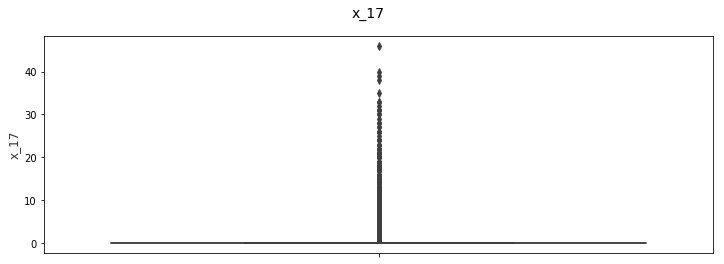

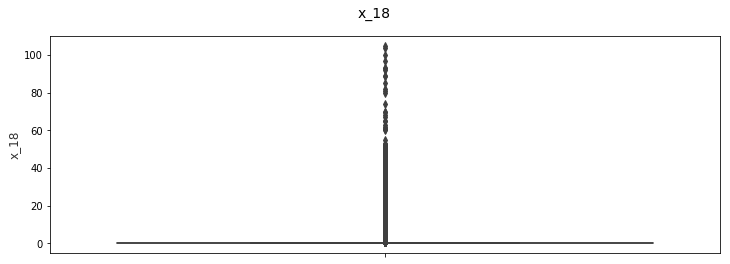

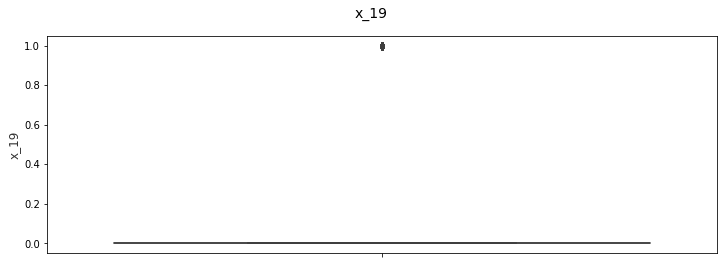

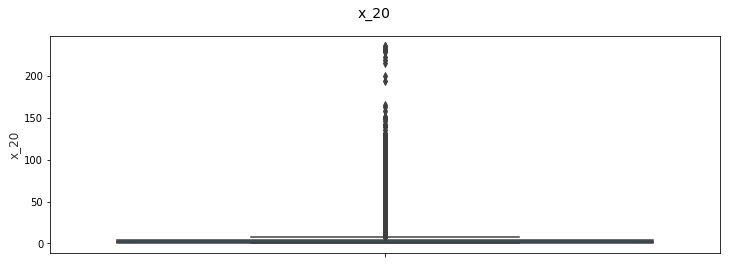

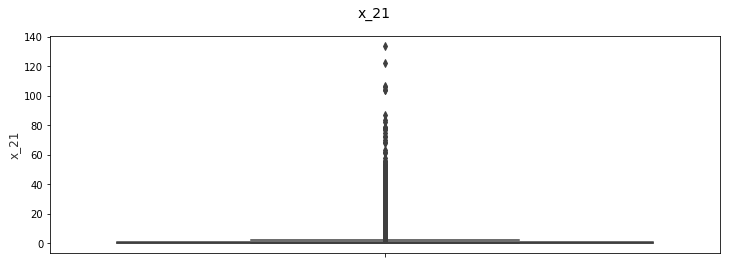

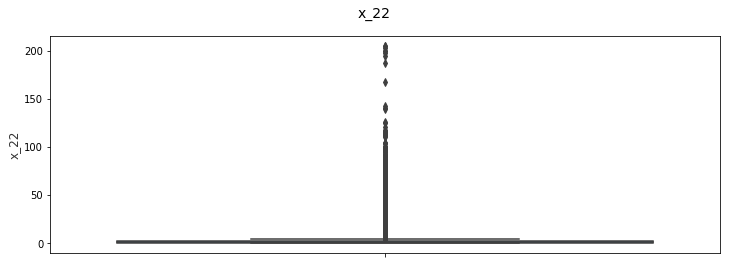

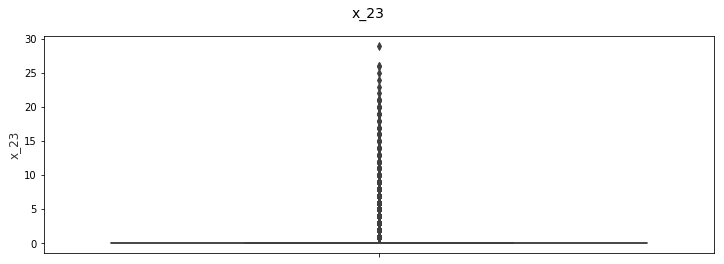

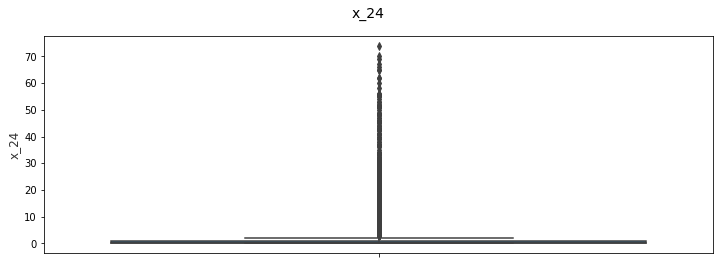

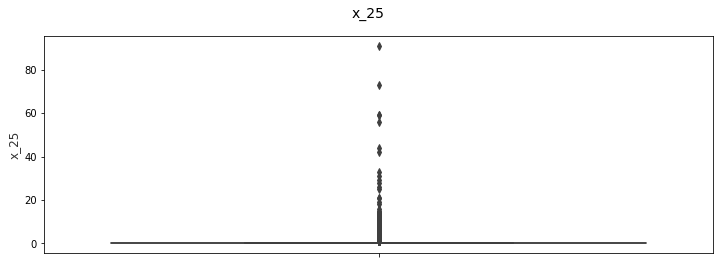

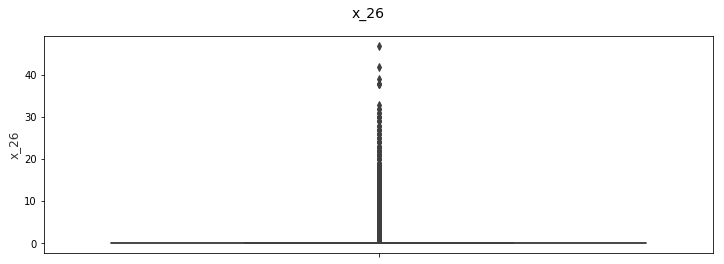

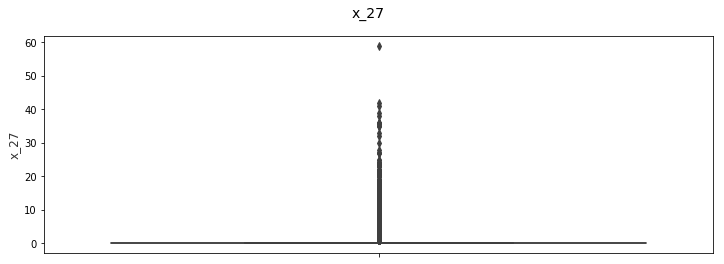

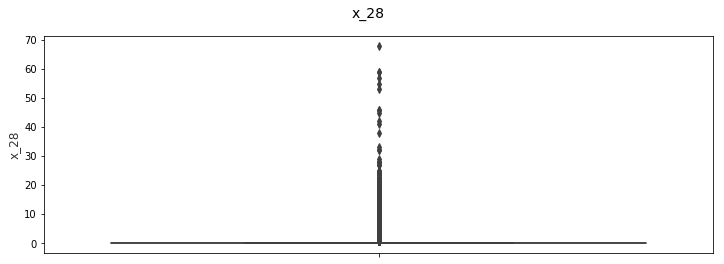

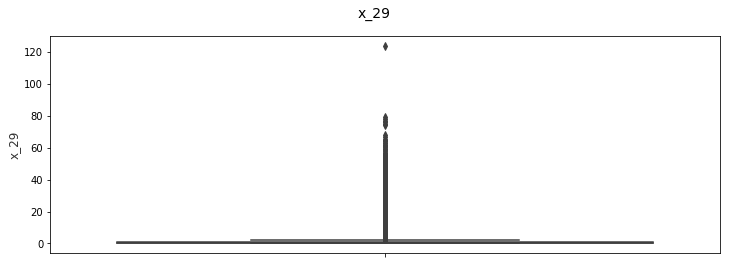

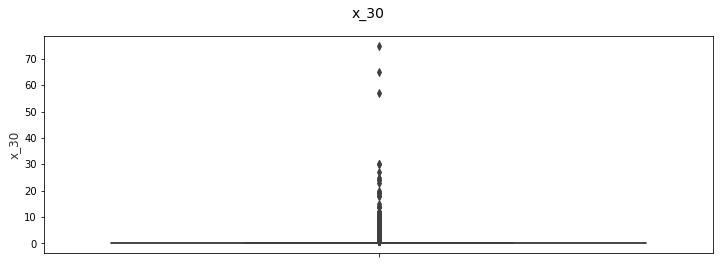

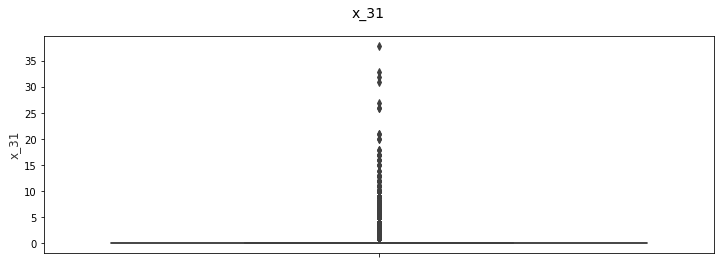

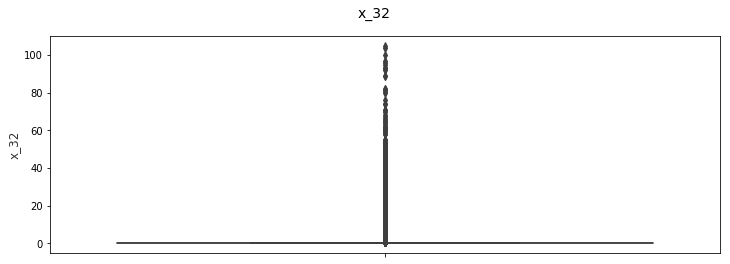

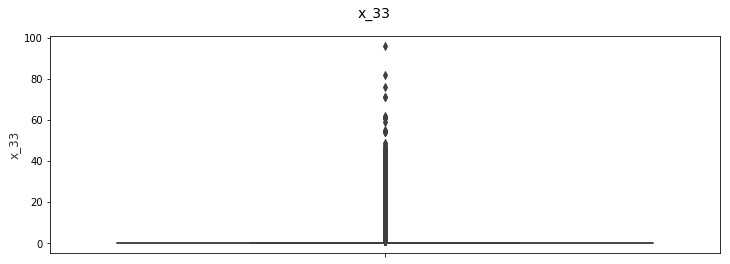

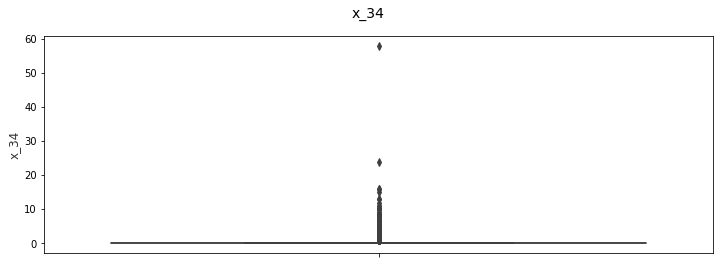

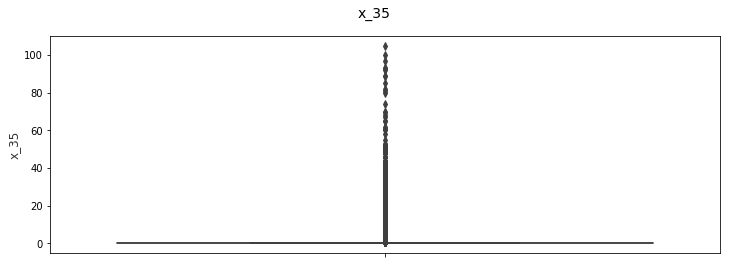

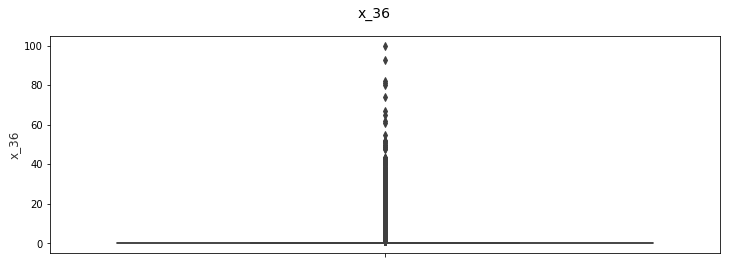

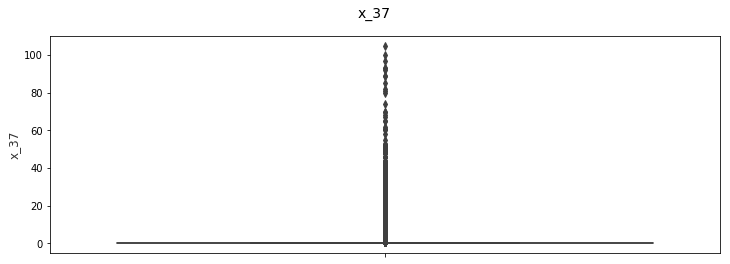

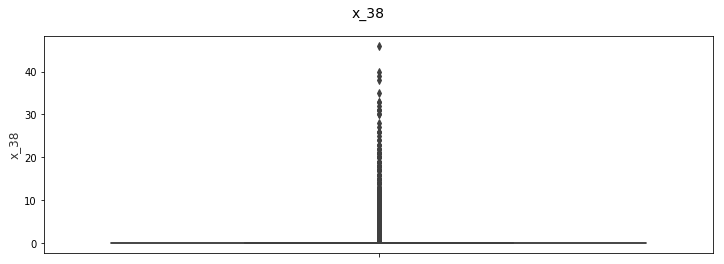

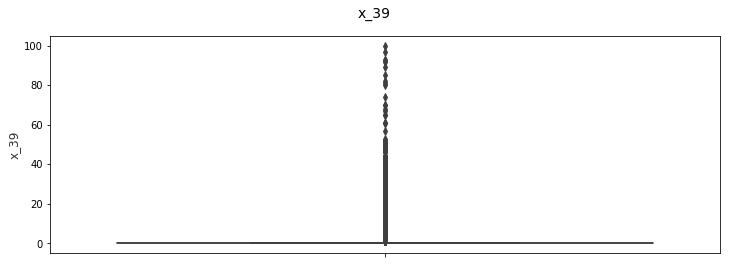

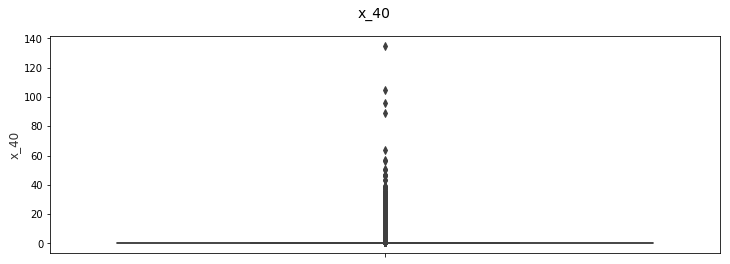

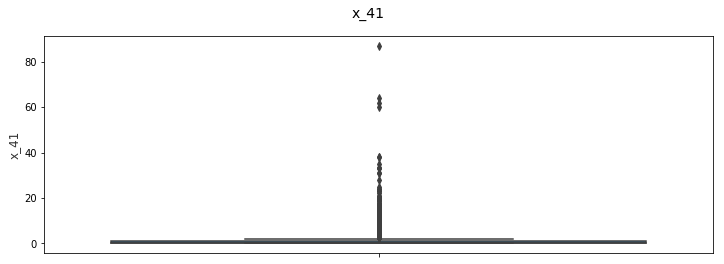

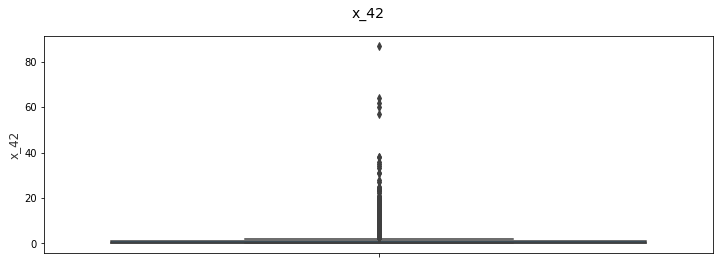

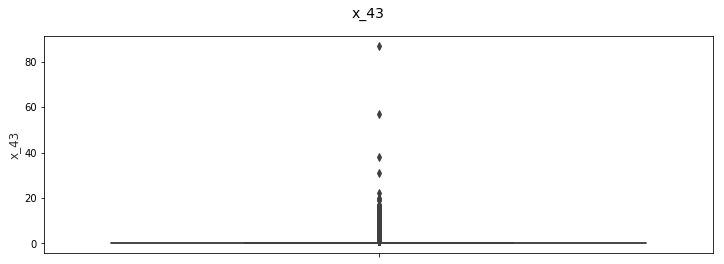

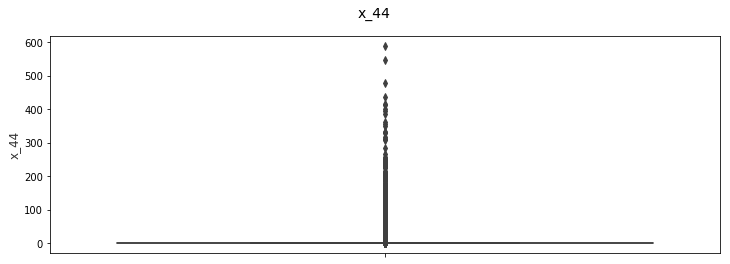

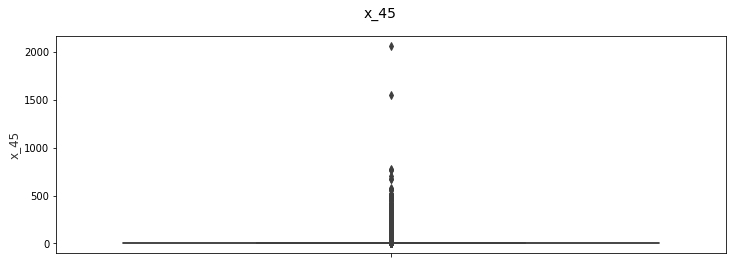

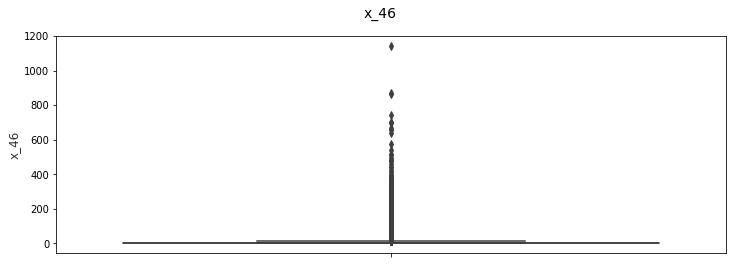

In [17]:
# box plot for numerical Variables
for var in ["x_%d" % i for i in range(len(rows[0])-3)]:
    f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
    f.suptitle(var, fontsize=14)

    sns.boxplot(y=var, data=data)
    ax.set_ylabel(var,size = 12,alpha=0.8)
    

We could see from the above box plots that most of the variables have significant outliers as indicated by elongated tails of the box plot. Thus we need a model which is robust to outliers

In [18]:
X = data[["x_%d" % i for i in range(len(rows[0])-3)]]
Y = data['completion_rate']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=100)

In [19]:
rf_pipeline = Pipeline([('rf',RandomForestRegressor(random_state=100, verbose=1, warm_start = True))])
parameters_rf = {'rf__n_estimators':(100,200),'rf__max_depth': (2, 4, 6, 8), 'rf__max_features': (0.5, 0.6, 0.7)}
opt_rf = GridSearchCV(rf_pipeline, parameters_rf, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=True)
opt_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   39.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=100, verbose=1, warm_start=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'rf__n_estimators': (100, 200), 'rf__max_depth': (2, 4, 6, 8), 'rf__max_features': (0.5, 0.6, 0.7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=True)

In [20]:
# Examining the results of cross validation 
pd.DataFrame(opt_rf.cv_results_)

/home/dgxuser_layersvanguard/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/dgxuser_layersvanguard/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/dgxuser_layersvanguard/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_features,param_rf__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,39.027287,2.922752,0.552141,0.047924,2,0.5,100,"{'rf__max_depth': 2, 'rf__max_features': 0.5, ...",-0.046927,-0.046599,...,-0.046864,0.000162,19,-0.046840,-0.046922,-0.046878,-0.046832,-0.046825,-0.046859,0.000036
1,81.906298,0.837513,0.926790,0.055982,2,0.5,200,"{'rf__max_depth': 2, 'rf__max_features': 0.5, ...",-0.046934,-0.046606,...,-0.046872,0.000162,20,-0.046849,-0.046929,-0.046887,-0.046839,-0.046831,-0.046867,0.000037
2,48.051374,0.996842,0.513883,0.047762,2,0.6,100,"{'rf__max_depth': 2, 'rf__max_features': 0.6, ...",-0.046965,-0.046631,...,-0.046892,0.000160,21,-0.046876,-0.046946,-0.046907,-0.046856,-0.046841,-0.046885,0.000038
3,95.546599,0.875008,1.000396,0.102665,2,0.6,200,"{'rf__max_depth': 2, 'rf__max_features': 0.6, ...",-0.046981,-0.046646,...,-0.046906,0.000160,23,-0.046892,-0.046960,-0.046920,-0.046871,-0.046860,-0.046901,0.000036
4,53.628293,1.254531,0.496294,0.044076,2,0.7,100,"{'rf__max_depth': 2, 'rf__max_features': 0.7, ...",-0.046950,-0.046651,...,-0.046901,0.000155,22,-0.046876,-0.046959,-0.046921,-0.046868,-0.046858,-0.046896,0.000038
5,106.270981,1.583575,0.991929,0.098012,2,0.7,200,"{'rf__max_depth': 2, 'rf__max_features': 0.7, ...",-0.046968,-0.046667,...,-0.046918,0.000154,24,-0.046893,-0.046976,-0.046938,-0.046884,-0.046872,-0.046912,0.000039
6,79.119037,1.238881,0.815692,0.067161,4,0.5,100,"{'rf__max_depth': 4, 'rf__max_features': 0.5, ...",-0.045864,-0.045533,...,-0.045766,0.000144,14,-0.045710,-0.045791,-0.045758,-0.045728,-0.045724,-0.045742,0.000029
7,156.231001,1.187281,1.625908,0.206891,4,0.5,200,"{'rf__max_depth': 4, 'rf__max_features': 0.5, ...",-0.045858,-0.045519,...,-0.045760,0.000146,13,-0.045705,-0.045779,-0.045757,-0.045720,-0.045718,-0.045736,0.000028
8,92.066267,2.086134,0.684118,0.068587,4,0.6,100,"{'rf__max_depth': 4, 'rf__max_features': 0.6, ...",-0.045892,-0.045564,...,-0.045796,0.000141,16,-0.045735,-0.045823,-0.045790,-0.045757,-0.045753,-0.045772,0.000031
9,182.239369,1.625960,1.478909,0.188581,4,0.6,200,"{'rf__max_depth': 4, 'rf__max_features': 0.6, ...",-0.045887,-0.045553,...,-0.045788,0.000142,15,-0.045731,-0.045810,-0.045782,-0.045746,-0.045747,-0.045763,0.000029


We could see that time difference for inference is almost double for random forest with 200 trees as compared to random forest with 100 trees while the erros is almost same. on the contary, random forest with 100 trees gives slightly better result.   

In [21]:
opt_rf.best_params_

{'rf__max_depth': 8, 'rf__max_features': 0.5, 'rf__n_estimators': 100}

In [22]:
opt_rf.best_score_

-0.044571445306473945

In [24]:
# Saving the random forest model with best parameters
joblib.dump(opt_rf.best_estimator_, "random_forest_predict_model.pkl", compress=1)

['random_forest_predict_model.pkl']